In [29]:
# import packages
import numpy as np  
import pandas as pd 
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline

# Dimension Reduction

## load the dataset

In [3]:
mypath = '/Users/yinzi/Downloads/crop_part1'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [4]:
df.head(3)

,age,gender,race,file
0,9,1,2,/Users/yinzi/Downloads/crop_part1/9_1_2_201612...
1,1,1,2,/Users/yinzi/Downloads/crop_part1/1_1_2_201612...
2,16,0,0,/Users/yinzi/Downloads/crop_part1/16_0_0_20170...


In [5]:
df['age']= df['age'].astype('int')
df['gender']= df['gender'].astype('int')
df['race']= df['race'].astype('int')
df.dtypes

age        int64
gender     int64
race       int64
file      object
dtype: object

In [6]:
images = []
for img_path in df['file']:
    img = io.imread(img_path)
    images.append(img)

In [7]:
images[0].shape

(200, 200, 3)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, df['gender'], test_size=0.3, random_state=42)

In [9]:
X_train[0].shape

(200, 200, 3)

In [10]:
X_grays = []
for img in X_train:
    img_gray = color.rgb2gray(img)
    X_grays.append(img_gray)

In [11]:
X_grays[0].shape

(200, 200)

In [12]:
X = np.array(X_grays)
X.shape

(6844, 200, 200)

In [13]:
X_flat = np.array(X_grays).reshape((6844, 200*200))
X_flat.shape

(6844, 40000)

## 1. Feature extraction
### 1.1 Principal component analysis - PCA

In [14]:
from sklearn.decomposition import PCA

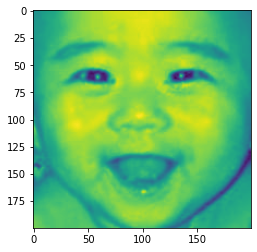

In [18]:
plt.imshow(X_grays[4])

In [26]:
pca_all = PCA(n_components = 600)
pca_all.fit(X_flat)
cum_variance = np.cumsum(pca_all.explained_variance_ratio_)
print(max(cum_variance))

0.9823419968599124


In [27]:
n = np.argmax(cum_variance>=0.95)+1
print(n)

195


Text(0, 0.5, 'Explained Variance')

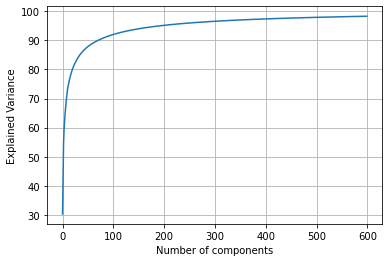

In [32]:
plt.grid()
plt.plot(cum_variance*100)
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

In [33]:
pca = PCA(n_components = 195)
reduced_gimages = pca.fit_transform(X_flat)
recovered_images = pca.inverse_transform(reduced_gimages)

In [34]:
print("reduced gray images shape: " + str(reduced_gimages.shape))
print("recovered images shape: " + str(recovered_images.shape))

reduced gray images shape: (6844, 195)
recovered images shape: (6844, 40000)


In [38]:
img_pca_195 = recovered_images[0, :].reshape([200, 200])

Text(0.5, 1.0, 'Origial gray image')

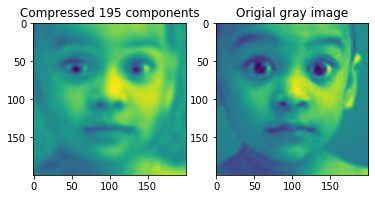

In [45]:
rows, cols = 1, 2
plt.subplot(rows, cols, 1)
plt.imshow(img_pca_195)
plt.title('Compressed 195 components')
plt.subplot(rows, cols, 2)
plt.imshow(X_grays[0])
plt.title('Origial gray image')

* Comparing those two images, we can see that PCA reduces a lot curse dimensions and the picture still looks clear for the face. PCA may help us to improve our models

### 1.2 Non-negative matrix factorization - NMF

In [46]:
from sklearn.decomposition import NMF

In [ ]:
nmf_model = NMF(n_components = 500, init = 'random', random_state = 0)
nmf_model.fit(X_flat)
nmf_features = nmf_model.transform(X_flat)

In [ ]:
print(nmf_features.shape)
print(nmf_components_.shape)